Epoch:  0
Epoch:  100
Epoch:  200
Epoch:  300
Epoch:  400
Epoch:  500
Epoch:  600
Epoch:  700
Epoch:  800
Epoch:  900
Epoch:  1000
Epoch:  1100
Epoch:  1200
Epoch:  1300
Epoch:  1400
Epoch:  1500
Epoch:  1600
Epoch:  1700
Epoch:  1800
Epoch:  1900


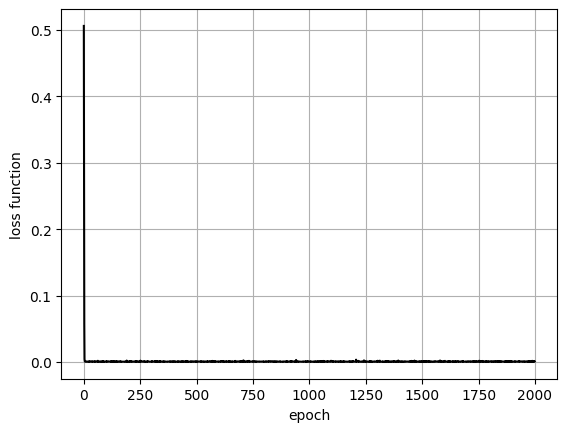

In [1]:
"""
Simple RBM test example using simple sine wave

Author: Fabrício Galende Marques de Carvalho

"""
from PIL import Image, ImageOps
from matplotlib import pyplot as plt
import torchvision.transforms as transforms
import torch
import numpy as np
from rbm_model import RBM
from random import shuffle


n_points = 1000
t = np.linspace(0, 1, n_points)
sine = np.sin(2 * np.pi * t) 
v0 = torch.tensor(sine, dtype=torch.float32).view(1, -1)

seed =  66
torch.manual_seed(seed)
output_repr_dim = 128
rbm_net = RBM(v0.shape[1], output_repr_dim)
n_epochs = 2000
epoch_loss = []
for epoch in range(n_epochs):
    if (epoch%100) == 0:
        print("Epoch: ", epoch)
    epoch_loss.append( rbm_net.contrastive_divergence(v0, eta=0.005).item() )
  
plt.figure()
plt.plot(epoch_loss,  color="black")
plt.xlabel("epoch" )
plt.ylabel("loss function")
plt.grid()







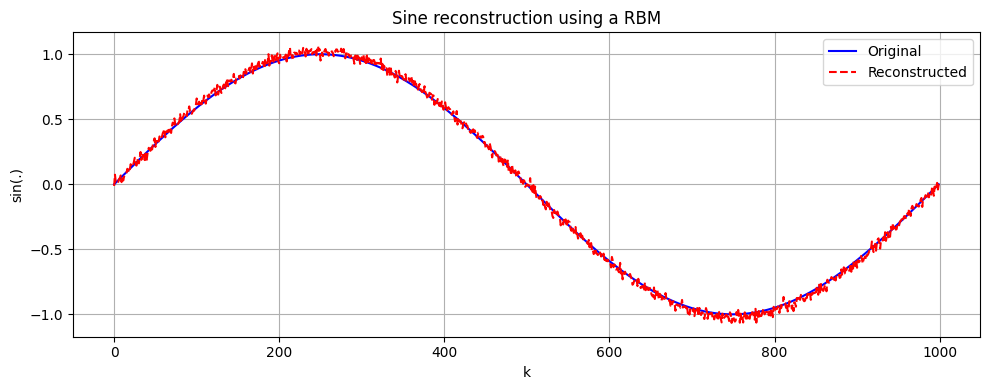

In [2]:
# Sine reconstruction

# Após o treinamento da RBM com a senoide
with torch.no_grad():
    visible_reconstructed = rbm_net.forward(v0)

original_np = v0.numpy().flatten()
reconstructed_np = visible_reconstructed.numpy().flatten()

plt.figure(figsize=(10, 4))
plt.plot(original_np, label="Original", color="blue")
plt.plot(reconstructed_np, label="Reconstructed", color="red", linestyle="--")
plt.title("Sine reconstruction using a RBM")
plt.xlabel("k")
plt.ylabel("sin(.)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


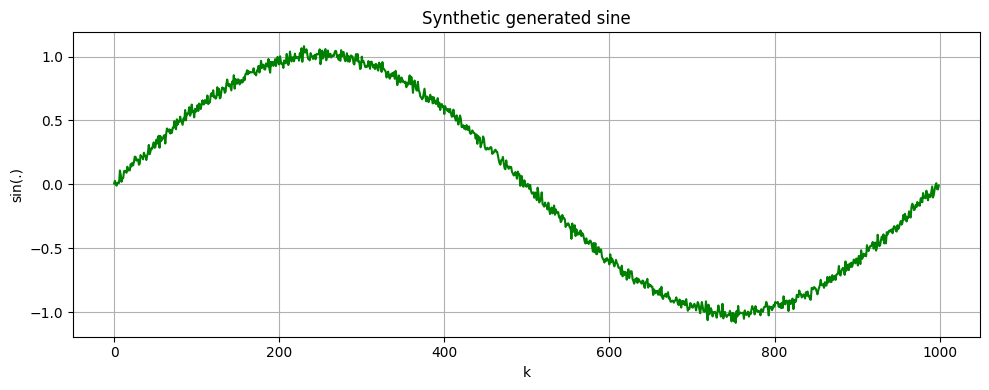

In [3]:
# Now we generate an synthetic sine
n_rounds = 2000
x = v0
for i in range(n_rounds):
    with torch.no_grad():
        _, h_sample = rbm_net.sample_h(x)
        _, x = rbm_net.sample_v(h_sample)  


sine_generated = x.numpy().flatten()

plt.figure(figsize=(10, 4))
plt.plot(sine_generated, label="Synthetic sine (RBM)", color="green")
plt.xlabel("k")
plt.ylabel("sin(.)")
plt.title("Synthetic generated sine")
plt.grid()
plt.tight_layout()
plt.show()

